In [3]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice

from queue import *
import math

In [135]:
class myDBSCAN():
    '''复现DBSCAN代码

    参数
    --------------------
    eps : float, default=0.5
        直接密度可达的距离最大值
    
    min_samples : int, default=5
        核心点需要满足的最小内部点数

    属性
    --------------------
    core_sample_indices_ : ndarray of shape (n_core_samples,)
        核心点的位置

    labels_ : ndarray of shape (n_samples)
        聚类结果标签
    '''
    core_sample_indices_ : np.ndarray
    labels_ : np.ndarray
    n_features_ : int

    def __init__(self, eps=0.5, min_samples=5) -> None:
        self.eps = eps
        self.min_samples = min_samples

    def _radius_neighbors(self, X, radius):
        '''计算得到每个点中满足要求的邻居节点

        参数
        --------------------
        X : ndarray of shape (n_samples, n_features)
            需要研究的数据
        
        radius : float
            半径范围

        返回
        --------------------
        neigh_ind : ndarray of shape (n_samples,) of arrays
            每个节点的邻居节点列表
        '''
        
        neigh_ind = []

        n_samples = X.shape[0]

        radius_square = radius ** 2

        for i in range(n_samples):
            dists = np.sum((X[i] - X) ** 2, axis=1)
            indices = np.where(dists <= radius_square)
            
            neigh_ind.append(indices)

        return neigh_ind
    
    def fit(self, X):
        '''计算KMeans聚类结果
        
        参数
        --------------------
        X : ndarray of shape (n_samples, n_features)

        返回
        --------------------
        self : object
            Fitted estimator.
        '''
        n_samples = X.shape[0]

        # 初始化结果
        C = []

        # 得到所有节点满足条件的邻居集合
        neigh_ind = self._radius_neighbors(X, self.eps)
        
        # 初始化核心点集合
        I = set()

        for i in range(n_samples):
            N_i = neigh_ind[i]
            
            if len(N_i[0]) >= self.min_samples:
                # 更新核心点集合
                I.add(i)
        self.core_sample_indices_ = np.array(I)
        # 初始化聚类数目
        k = 0
        
        # 初始化未被访问的样本集合
        P = {i for i in range(n_samples)}

        while P:
            tmp = P.copy()
            
            # 随机选取一个核心点
            j = choice(list(I))
            
            # 初始化队列
            Q = Queue()
            Q.put(j)

            # 将该核心点从集合中剔除
            I.remove(j)
            
            while not Q.empty():
                # 取出Q中首个样本
                xq = Q.get()
                
                if len(neigh_ind[xq][0]) >= self.min_samples:
                    R = set(neigh_ind[xq][0]).intersection(P)

                    # 将R的样本加入队列Q
                    for item in R:
                        Q.put(item)

                    P = P.difference(R)
            
            k += 1
            
            # 生成一个新的类Ck
            Ck = tmp.difference(P)
            print(Ck)
            
            C.append(Ck)
            

            # 更新核心点集合
            I = I.difference(Ck)
        self.n_features_ = k
        self.labels_ = -np.ones((n_samples, ))
        for i in range(len(C)):
            for eachMember in C[i]:
                self.labels_[eachMember] = i

        return self

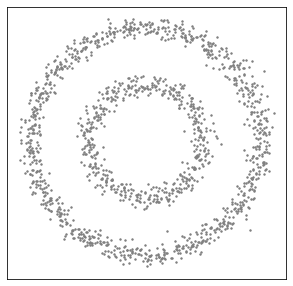

In [49]:
# 构造数据集用于验证
## Case Four : Ring Plot
r1 = 1
r2 = 2
n_samples = 1500
K = r1+r2
n_subset1 = int(n_samples/K)
n_subset2 = int(n_samples/K*(K-1))
theta1 = np.linspace(1,360,n_subset1)/360*2*math.pi
theta2 = np.linspace(1,360,n_subset2)/360*2*math.pi
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset1,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset2,2))

x41 = np.transpose(np.array([[r1 * math.cos(theta1[i]) for i in range(len(theta1))],
               [r1 * math.sin(theta1[i]) for i in range(len(theta1))]])) + z1
x42 = np.transpose(np.array([[r2 * math.cos(theta2[i]) for i in range(len(theta2))],
               [r2 * math.sin(theta2[i]) for i in range(len(theta2))]])) + z2
dataset = np.r_[x41,x42]

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x41[:,0],x41[:,1],color="grey",s = 2)
plt.scatter(x42[:,0],x42[:,1],color="grey",s = 2)

In [150]:
model = myDBSCAN(eps=0.24, min_samples=5)

model.fit(dataset)
result = np.array(model.labels_)


{500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699,

[]

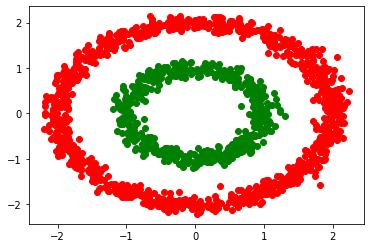

In [151]:
K = model.n_features_

color = ["red", "green", "blue", "yellow", "orange", "gray"]
for i in range(K):
    plt.scatter(dataset[result == i][:, 0], dataset[result == i][:, 1], color=color[i])
plt.plot()